# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10 (from 1)
Receiving objects: 100% (10/10), 11.01 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
!ls MNIST

processed  raw


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(np.float64(-0.5), np.float64(232.5), np.float64(87.5), np.float64(-0.5))

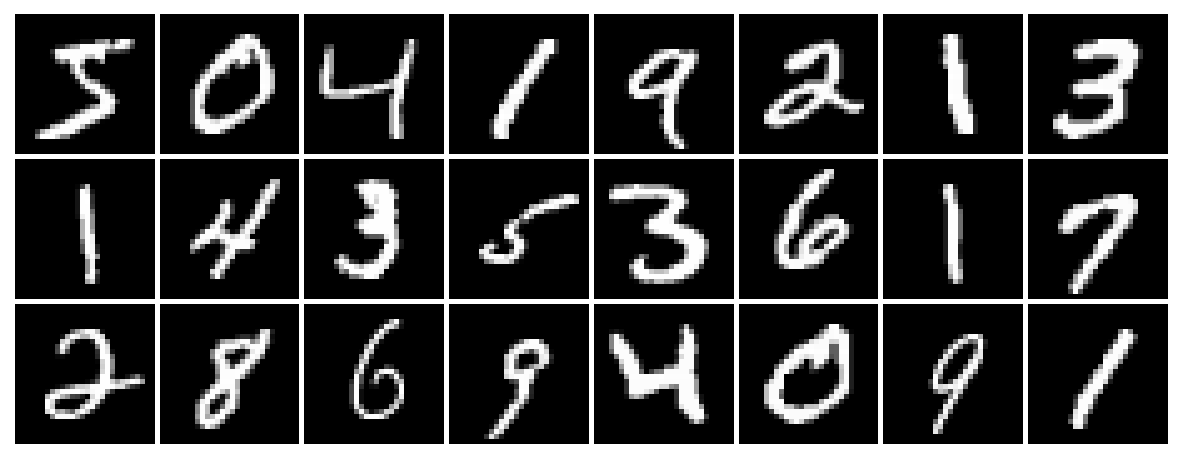

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


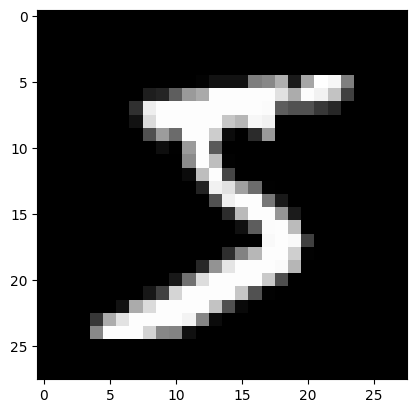

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [10]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na saída

### Testando um predict com poucas amostras

In [11]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[ 0.4357, -0.0831,  0.1697, -0.2918,  0.1576, -0.2602,  0.1463, -0.0398,
         -0.0517, -0.0006],
        [ 0.2515,  0.0907,  0.1848, -0.3843,  0.0432, -0.0149,  0.2402, -0.2330,
         -0.2905, -0.0375],
        [ 0.0475,  0.0831, -0.2057, -0.0612, -0.1937,  0.0738,  0.1433, -0.2525,
         -0.0020, -0.0656],
        [ 0.0156,  0.2517,  0.0205,  0.2001, -0.0992, -0.1022, -0.1547,  0.0250,
          0.0947,  0.0333],
        [ 0.2054,  0.1299,  0.1927, -0.1773, -0.0283,  0.0467, -0.0146,  0.0092,
         -0.1888, -0.3150]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [12]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [13]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-6enddq1f
  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz /tmp/pip-req-build-6enddq1f
  Resolved https://github.com/szagoruyko/pytorchviz to commit 5cf04c13e601366f6b9cf5939b5af5144d55b887
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4972 sha256=36822939b01cd177f4ba78454f3301a0d33bf09a4ec8c350f3f9daca23945abe
  Stored in directory: /tmp/pip-ephem-wheel-cache-6t1hpt2y/wheels/8a/88/98/69bcb99aba99a6bba9b2b81439cbda0101df40c49e639c4216
Successfully built torchviz


In [14]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3071, grad_fn=<NllLossBackward0>)

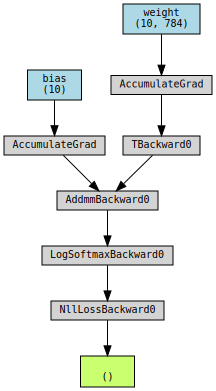

In [15]:
p = make_dot(loss, dict(model.named_parameters()))
p

### Laço de treinamento dos pesos

In [16]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()


In [17]:
print('Final loss:', loss.item())

Final loss: 0.265099436044693


### Visualizando gráfico de perda durante o treinamento

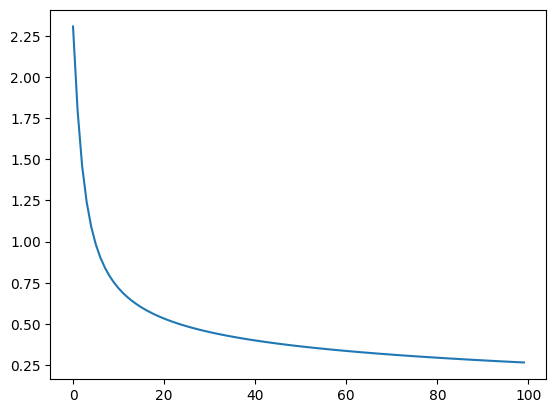

In [18]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [19]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.944


### Matriz de confusão com dados de treinamento e teste

In [20]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,1,0,0,0,2,3,1,0
2,0,1,91,1,0,1,0,1,1,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,1,0,1,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,91,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,2,0,0,83,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


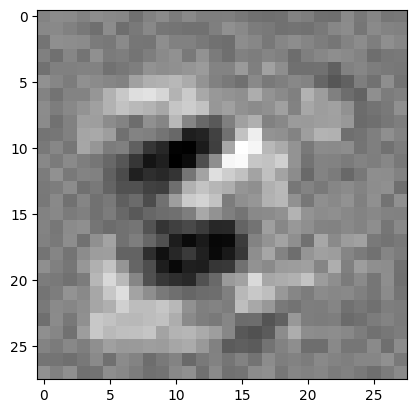

In [21]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[3, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

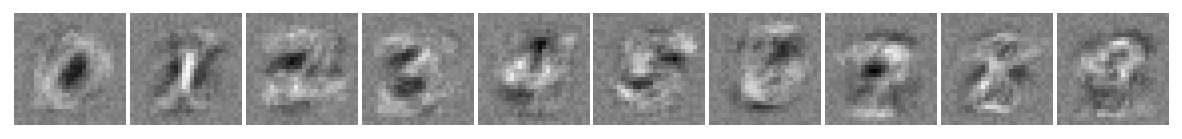

In [22]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia

In [23]:
num_epochs = 20
learning_rate = 0.1

# Dimensões
n_input = 28 * 28
n_classes = 10

# Reorganiza as imagens
x_train = x_train.view(-1, n_input)
y_train = y_train

# Modelo e função de perda
model = torch.nn.Linear(n_input, n_classes)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Loop de treinamento
for epoch in range(num_epochs):
    # Forward
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Cálculo da acurácia
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == y_train).sum().item()
    accuracy = correct / y_train.size(0)

    # Impressão da época
    print(f"Época [{epoch+1}/{num_epochs}] - Perda: {loss.item():.4f} - Acurácia: {accuracy*100:.2f}%")

Época [1/20] - Perda: 2.3054 - Acurácia: 11.80%
Época [2/20] - Perda: 2.1881 - Acurácia: 31.80%
Época [3/20] - Perda: 2.0837 - Acurácia: 48.90%
Época [4/20] - Perda: 1.9882 - Acurácia: 62.70%
Época [5/20] - Perda: 1.9002 - Acurácia: 68.70%
Época [6/20] - Perda: 1.8188 - Acurácia: 71.30%
Época [7/20] - Perda: 1.7437 - Acurácia: 72.70%
Época [8/20] - Perda: 1.6742 - Acurácia: 74.70%
Época [9/20] - Perda: 1.6102 - Acurácia: 75.20%
Época [10/20] - Perda: 1.5510 - Acurácia: 76.40%
Época [11/20] - Perda: 1.4964 - Acurácia: 76.50%
Época [12/20] - Perda: 1.4459 - Acurácia: 77.90%
Época [13/20] - Perda: 1.3992 - Acurácia: 78.50%
Época [14/20] - Perda: 1.3559 - Acurácia: 79.00%
Época [15/20] - Perda: 1.3158 - Acurácia: 79.30%
Época [16/20] - Perda: 1.2786 - Acurácia: 79.70%
Época [17/20] - Perda: 1.2439 - Acurácia: 80.40%
Época [18/20] - Perda: 1.2116 - Acurácia: 80.70%
Época [19/20] - Perda: 1.1814 - Acurácia: 81.00%
Época [20/20] - Perda: 1.1532 - Acurácia: 81.10%


- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

In [25]:
num_epochs = 20
learning_rate = 0.1

# Dimensões
n_input = 28 * 28
n_classes = 10

# Reorganiza as imagens
x_train = x_train.view(-1, n_input)
y_train = y_train

# Modelo e função de perda
model = torch.nn.Linear(n_input, n_classes)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Loop de treinamento
for epoch in range(num_epochs):
    # Forward
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward
    optimizer.zero_grad()
    loss.backward()

    # Visualização dos gradientes da classe 4 (dentro do loop!)
    with torch.no_grad():
        grad_class4 = model.weight.grad[4]  # Gradientes da classe 4
        print(f"Gradientes (classe 4) - média: {grad_class4.mean():.6f}, desvio padrão: {grad_class4.std():.6f}")

    # Atualiza os pesos
    optimizer.step()

    # Cálculo da acurácia
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == y_train).sum().item()
    accuracy = correct / y_train.size(0)

    # Impressão da época
    print(f"Época [{epoch+1}/{num_epochs}] - Perda: {loss.item():.4f} - Acurácia: {accuracy*100:.2f}%")

Gradientes (classe 4) - média: -0.000977, desvio padrão: 0.012020
Época [1/20] - Perda: 2.3084 - Acurácia: 11.50%
Gradientes (classe 4) - média: -0.000678, desvio padrão: 0.011669
Época [2/20] - Perda: 2.1950 - Acurácia: 28.30%
Gradientes (classe 4) - média: -0.000497, desvio padrão: 0.011324
Época [3/20] - Perda: 2.0908 - Acurácia: 47.40%
Gradientes (classe 4) - média: -0.000384, desvio padrão: 0.010981
Época [4/20] - Perda: 1.9944 - Acurácia: 60.00%
Gradientes (classe 4) - média: -0.000312, desvio padrão: 0.010641
Época [5/20] - Perda: 1.9053 - Acurácia: 66.60%
Gradientes (classe 4) - média: -0.000264, desvio padrão: 0.010303
Época [6/20] - Perda: 1.8230 - Acurácia: 70.90%
Gradientes (classe 4) - média: -0.000230, desvio padrão: 0.009970
Época [7/20] - Perda: 1.7469 - Acurácia: 73.00%
Gradientes (classe 4) - média: -0.000204, desvio padrão: 0.009643
Época [8/20] - Perda: 1.6768 - Acurácia: 74.30%
Gradientes (classe 4) - média: -0.000182, desvio padrão: 0.009323
Época [9/20] - Perda: 

## Perguntas

1. Qual é o shape da matriz de entrada na rede?
2. Qual é o shape da saída da rede?
3. Qual é o número total de parâmetros da rede, incluindo o bias?

In [26]:
# 1-
print("Shape da matriz de entrada na rede:", x_train.shape)

# 2-
print("Shape da saída da rede:", outputs.shape)

Shape da matriz de entrada na rede: torch.Size([1000, 784])
Shape da saída da rede: torch.Size([1000, 10])


3 - A camada linear tem **784 pesos** para **10 classes**, e temos **10 bias**.

Logo: **Parâmetros** = (784 x 10) + 10 = 7.850

Temos **7.850 parãmetros de rede**.

# Aprendizados

O exercício permitiu compreender o funcionamento da regressão logística multiclasse (Softmax) aplicada ao conjunto de dados MNIST e entre outros aspectos:

* Com a definição de uma camada linear simples, seguida da função de perda de entropia cruzada, observa-se que o modelo ajusta seus pesos, minimizando o erro entre as predições e as classes verdadeiras;

* A importância da normalização dos dados e do cálculo de acurácia como métrica de desempenho, possibilitando a análise dos gradientes de cada classe;

* O modelo mostrou-se eficiente para analisar padrões encontrados nas imagens, do dataset e ainda que redes lineares podem ser aplicadas em tarefas de classificação multiclasse quando combinadas com a função Softmax e um otimizador adequado (SGD).